## Business Problem Understanding

**Context**  
As a data scientist in a leading online E-commerce company, your goal is to predict customer churn. Churn refers to customers who stop engaging or making purchases from the company. Identifying potential churned customers is crucial for the business to take proactive measures, such as offering targeted promotions or incentives, to retain those customers and prevent revenue loss.

The online retail company wants to leverage data science techniques to predict customer churn accurately. By doing so, they can prioritize their efforts and resources towards retaining customers who are at a higher risk of churning. This approach allows the company to maximize customer retention, improve customer satisfaction, and increase overall revenue.

To accomplish this, you will analyze various customer-related data points, such as tenure, warehouse-to-home distance, number of devices registered, preferred order categories, satisfaction scores, marital status, number of addresses, complaints, days since last order, cashback amounts, and other relevant factors. By examining historical customer behavior, demographics, and purchase patterns, you aim to build a predictive model that can forecast whether a customer is likely to churn or not.

The model's predictions will serve as a valuable tool for the company to prioritize and personalize its customer retention strategies. By proactively reaching out to customers identified as at risk of churn, the company can offer tailored promotions, discounts, or incentives to encourage them to continue their engagement and purchases. Ultimately, the objective is to minimize customer churn, increase customer loyalty, and drive revenue growth for the online retail company.

Target:


1: Represents customers who have churned (churned customers).

0: Represents customers who have not churned (not churned customers).

**Problem Statement :**

The problem at hand is to predict customer churn in an online E-commerce company. The objective is to develop a predictive model that can accurately identify customers who are likely to churn. By doing so, the company can take proactive measures to retain those customers and minimize revenue loss.

**Goals :**

1. Develop an accurate predictive model: The primary goal is to build a machine learning model that can accurately predict customer churn. The model should utilize historical customer data and relevant features to make predictions on new, unseen data. The aim is to achieve a high level of prediction accuracy to effectively identify customers who are likely to churn.

2. Minimize customer churn: By accurately predicting customer churn, the goal is to proactively identify customers who are at risk of leaving the online E-commerce platform. This enables the company to take timely actions and implement targeted strategies to retain those customers. The ultimate objective is to minimize customer churn, reduce revenue loss, and maintain a loyal customer base.

3. Optimize customer retention strategies: The predictions from the churn prediction model provide valuable insights for developing and optimizing customer retention strategies. The goal is to leverage the model's predictions to identify factors and patterns associated with churned customers. This information can then be used to design personalized offers, promotions, and proactive interventions aimed at retaining customers and enhancing their loyalty.

4. Improve customer satisfaction: By proactively identifying potential churned customers, the company can address any underlying issues or concerns, enhance customer support, and improve the overall customer experience. The goal is to address customer needs, enhance satisfaction levels, and increase the likelihood of customers staying engaged and making repeat purchases.

5. Drive business growth: Ultimately, the goal is to achieve business growth by reducing churn and maximizing customer retention. By accurately predicting customer churn and implementing effective retention strategies, the company aims to maintain and grow its customer base, increase customer loyalty, and drive revenue growth.


## Data Understanding

### Attribute Information

* Tenure: The length of time the customer has been a subscriber (in months).
* WarehouseToHome: The distance between the warehouse and the customer's home.
* NumberOfDeviceRegistered: The number of devices registered by the customer.
* PreferedOrderCat: The customer's preferred order category in the last month.
* SatisfactionScore: The customer's satisfaction score for the service provided.
* MaritalStatus: The customer's marital status.
* NumberOfAddress: The number of addresses associated with the customer.
* Complaint: The complaint status in the last month.
* DaySinceLastOrder: The number of days since the customer's last order.
* CashbackAmount: The average cashback amount received by the customer in the last month.
* Churn: The customer's churn status (whether they have churned or not).

These are the features or attributes available for analysis in the dataset. Each feature provides valuable information about the customer's profile, behavior, and interactions with the E-commerce company. The "Churn" column indicates whether a customer has churned (1) or not (0), which is the target variable for predicting customer churn.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report


In [2]:
df =  pd.read_csv('data_ecommerce_customer_churn.csv')

In [3]:
df.head(10)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
5,7.0,16.0,4,Mobile Phone,2,Divorced,2,0,11.0,152.81,0
6,1.0,15.0,6,Mobile Phone,5,Divorced,3,0,2.0,149.51,0
7,1.0,11.0,4,Mobile Phone,5,Single,3,0,1.0,154.73,1
8,11.0,12.0,4,Mobile Phone,3,Married,2,0,4.0,137.02,0
9,17.0,7.0,3,Laptop & Accessory,1,Married,5,1,2.0,157.43,0


From the output of `value_counts()`, we can observe an imbalance in the distribution of the independent variable in this dataset.

The independent variable (y) in this dataset is "Churn", which indicates whether a customer has churned or not.

If we analyze the count of each unique value in the "Churn" column using `value_counts()`, we can see that there is a significant imbalance between the number of churned customers and non-churned customers.

Addressing class imbalance is important as it can affect the performance and accuracy of predictive models. Techniques such as oversampling the minority class, undersampling the majority class, or using specialized algorithms for imbalanced data can be applied to mitigate the impact of class imbalance and improve model performance.


In [4]:
df['Churn'].value_counts()

Churn
0    3267
1     674
Name: count, dtype: int64

## Data Cleaning
In the dataset, there are missing values in the "Tenure" and "WarehouseToHome" columns, which account for 4% of the total data (194 and 169 instances, respectively). Additionally, there are NaN values in the "DaySinceLastOrder" column, which account for 5% or 213 instances. To handle this missing data, we will drop the corresponding rows.

We choose to drop the rows with missing values to maintain the integrity and originality of the data. By removing these rows, we can ensure that the remaining data points are complete and reliable for analysis and modeling purposes.

Therefore, no other columns will be dropped as they are crucial in capturing relevant information and patterns for predicting customer churn.

After performing the data cleaning process, we will have a cleaned dataset ready for further analysis and the development of machine learning models to address the problem at hand.

In [5]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Tenure,float64,194,4.92,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
1,WarehouseToHome,float64,169,4.29,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
2,NumberOfDeviceRegistered,int64,0,0.00,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,object,0,0.00,6,"[Laptop & Accessory, Mobile, Fashion, Others, ..."
4,SatisfactionScore,int64,0,0.00,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,object,0,0.00,3,"[Single, Married, Divorced]"
6,NumberOfAddress,int64,0,0.00,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,int64,0,0.00,2,"[0, 1]"
8,DaySinceLastOrder,float64,213,5.40,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,..."
9,CashbackAmount,float64,0,0.00,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."


First, we will drop the NaN values using the df.dropna() function to ensure that our dataset is clean and ready for further analysis and modeling.

In [6]:
df.dropna(inplace=True)

In [7]:
# Assuming df is your DataFrame and 'MaritalStatus' is the column of interest
df['MaritalStatus'] = df['MaritalStatus'].replace('Divorced', 'Single')

We will perform outlier detection specifically on the "CashbackAmount" column. The reason for focusing on this column is that it contains continuous data, and identifying outliers in continuous variables is a common practice in data analysis.

By checking for outliers in the "CashbackAmount" column, we can identify any extreme values that may exist in the dataset. This will help us understand the distribution of cashback amounts and determine if there are any data points that need further investigation or treatment.

i use a **box plot** to visualize the distribution of data in the "CashbackAmount" column. A box plot provides a graphical representation of the data's central tendency, spread, and any potential outliers.

<AxesSubplot: >

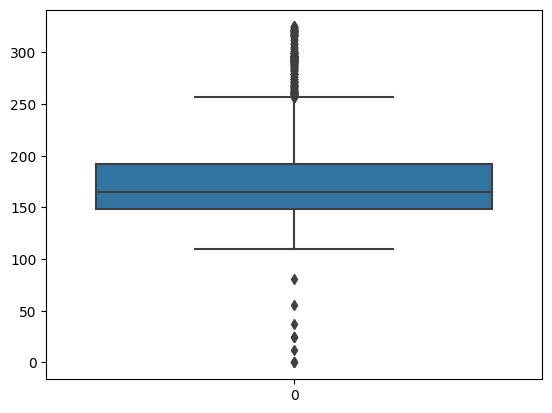

In [8]:
sns.boxplot(df['CashbackAmount'])

**Find the Upperbound and Lowerbound**

By examining the distribution of the "CashbackAmount" column, i have identified the presence of outliers. To gain more insight and understand the extent of the outlier values, i do calculate the lower and upper bounds.

Upon performing the calculations, we found that:

UpperBound: 256.72

LowerBound : 83.43999999999996

These values will help us identify the exact range within which the outlier data points lie, providing us with a clearer understanding of the outlier presence in the "CashbackAmount" column.

In [9]:
def calculate_outlier_bounds(data, factor=1.5):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    
    lower_bound = q1 - (factor * iqr)
    upper_bound = q3 + (factor * iqr)
    
    return lower_bound, upper_bound

# Assuming df is your DataFrame and 'CashbackAmount' is the column of interest
cashback_data = df['CashbackAmount'].values

lower_bound, upper_bound = calculate_outlier_bounds(cashback_data)

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)


Lower bound: 83.43999999999996
Upper bound: 256.72


After visualizing the outlier data, we observed that the gap between the outliers and the upper or lower bound is not excessively wide. Based on this observation, we can assume that there is no need to drop or make adjustments to the values of the data.

The proximity of the outliers to the upper and lower bounds suggests that they may not be significant outliers that require special treatment. It indicates that the data points outside the bounds do not deviate drastically from the overall pattern of the dataset. Therefore, we can conclude that the outliers in the "CashbackAmount" column may not have a significant impact on our analysis and modeling tasks.

As a result, we can proceed with further analysis and modeling using the original data without the need for outlier removal or adjustment.

In [10]:
outliers = df[(df['CashbackAmount'] < lower_bound) | (df['CashbackAmount'] > upper_bound)]

display(outliers)


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
18,19.0,27.0,4,Grocery,1,Married,2,1,11.0,259.96,0
32,11.0,17.0,2,Fashion,1,Married,3,1,9.0,262.44,0
36,24.0,31.0,4,Grocery,3,Married,5,1,6.0,264.73,0
43,17.0,21.0,4,Grocery,5,Married,8,0,1.0,296.59,0
...,...,...,...,...,...,...,...,...,...,...,...
3869,7.0,24.0,4,Grocery,3,Single,3,0,1.0,299.44,0
3875,18.0,6.0,1,Others,1,Married,1,0,7.0,292.02,0
3889,31.0,36.0,5,Grocery,2,Married,5,0,1.0,266.18,0
3914,17.0,10.0,1,Others,5,Married,2,0,13.0,291.90,0


## Data Analysis

In [11]:
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
5,7.0,16.0,4,Mobile Phone,2,Single,2,0,11.0,152.81,0


### Visualisation and Analysis WarehouseToHome

In the 'WarehouseToHome' column, we can observe an outlier value of 127. We can assume this as an outlier because the distance value of 127 is extremely different from the other values. Additionally, there is only one data point with this value.

The presence of an outlier can be identified by considering the extreme deviation of a data point from the overall pattern of the dataset. In this case, the distance value of 127 stands out as it is significantly different from the other values, which suggests a potential anomaly or measurement error.

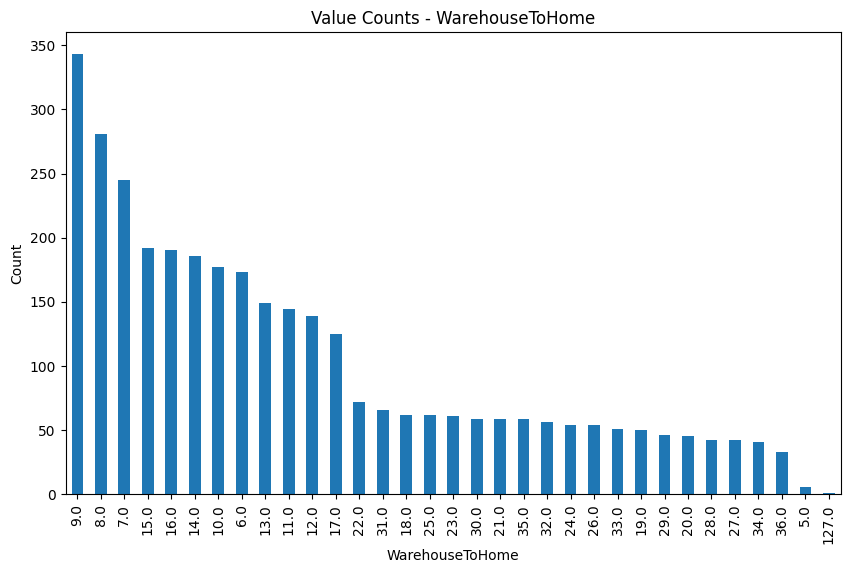

In [12]:
# Calculate value counts of WarehouseToHome column
warehouse_counts = df['WarehouseToHome'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
warehouse_counts.plot(kind='bar')
plt.title('Value Counts - WarehouseToHome')
plt.xlabel('WarehouseToHome')
plt.ylabel('Count')
plt.show()


In [13]:
df = df[df['WarehouseToHome'] != 127]

In [14]:
df['WarehouseToHome'].value_counts()

WarehouseToHome
9.0     343
8.0     281
7.0     245
15.0    192
16.0    190
14.0    186
10.0    177
6.0     173
13.0    149
11.0    144
12.0    139
17.0    125
22.0     72
31.0     66
18.0     62
25.0     62
23.0     61
30.0     59
21.0     59
35.0     59
32.0     56
24.0     54
26.0     54
33.0     51
19.0     50
29.0     46
20.0     45
28.0     42
27.0     42
34.0     41
36.0     33
5.0       6
Name: count, dtype: int64

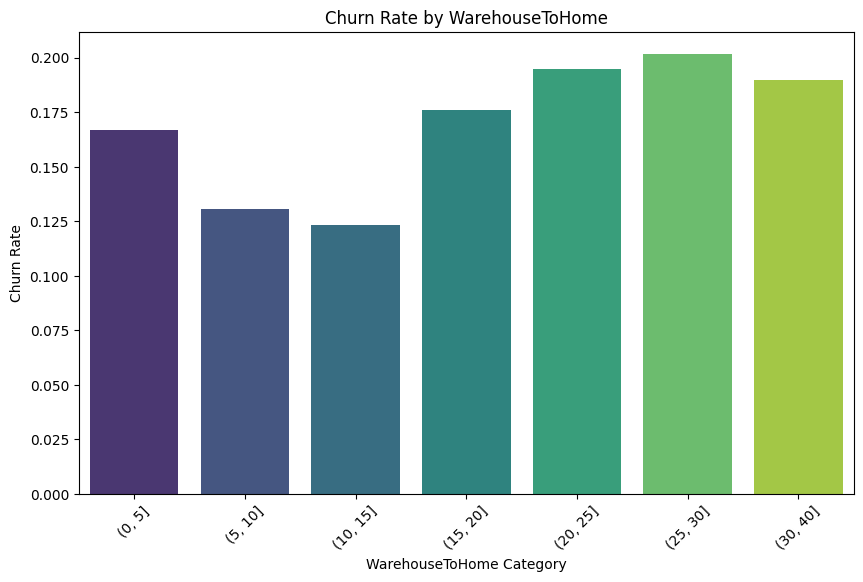

In [15]:
# Define the bins or categories for 'WarehouseToHome'
bins = [0, 5, 10, 15, 20, 25, 30,40]

# Create a new column 'WarehouseToHomeCategory' to represent the bins
df['WarehouseToHomeCategory'] = pd.cut(df['WarehouseToHome'], bins=bins)

# Calculate the churn rates for each category of 'WarehouseToHomeCategory'
churn_rates = df.groupby('WarehouseToHomeCategory')['Churn'].mean().reset_index()

# Sort the data by 'WarehouseToHomeCategory' in ascending order
churn_rates = churn_rates.sort_values('WarehouseToHomeCategory')

# Plot the churn rates
plt.figure(figsize=(10, 6))
sns.barplot(x='WarehouseToHomeCategory', y='Churn', data=churn_rates, palette='viridis')
plt.xlabel('WarehouseToHome Category')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by WarehouseToHome')
plt.xticks(rotation=45)
plt.show()

### Visualisation and Analysis Tenure

In the 'Tenure' column, we can observe that the highest value count is for the category "1 month" or "under 1 month". Based on this observation, we can assume that the e-commerce application is relatively new and has recently gained popularity.

Additionally, we can see that the maximum tenure in the dataset is 61 months, indicating that the application has been in existence for 61 months. It is interesting to note that the data includes individuals with a tenure of 61 months, suggesting that the application has been known and used by customers for a significant period.

Considering the information provided, it is reasonable to infer that the e-commerce application started gaining recognition around the 31st month. The increasing number of users and the presence of longer tenures indicate the growing popularity and longevity of the application in the market.

This understanding of the distribution and trends in tenure can help us assess the development and success of the e-commerce application over time, as well as provide insights into customer behavior and loyalty.

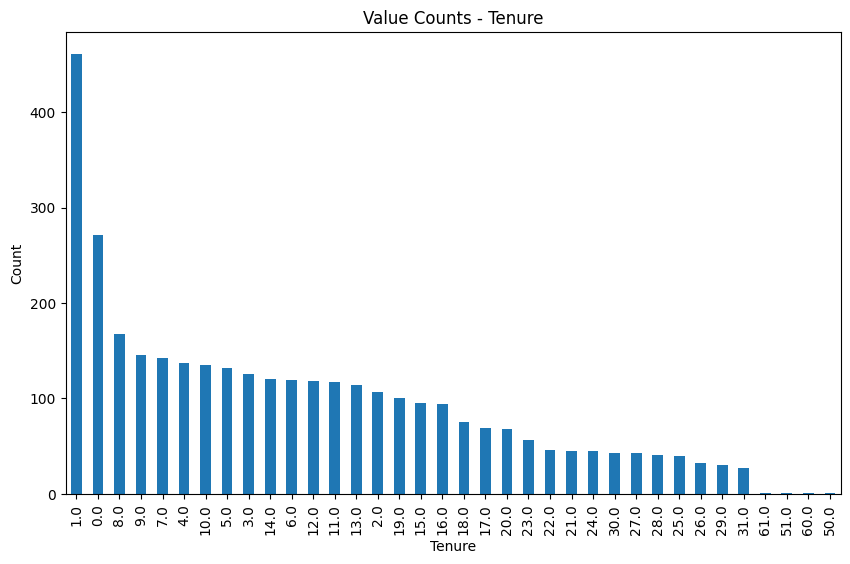

In [16]:
# Calculate value counts of Tenure column
warehouse_counts = df['Tenure'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
warehouse_counts.plot(kind='bar')
plt.title('Value Counts - Tenure')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

In [17]:
df['Tenure'].value_counts()

Tenure
1.0     461
0.0     271
8.0     167
9.0     145
7.0     142
4.0     137
10.0    135
5.0     132
3.0     126
14.0    120
6.0     119
12.0    118
11.0    117
13.0    114
2.0     107
19.0    100
15.0     95
16.0     94
18.0     75
17.0     69
20.0     68
23.0     56
22.0     46
21.0     45
24.0     45
30.0     43
27.0     43
28.0     41
25.0     40
26.0     32
29.0     30
31.0     27
61.0      1
51.0      1
60.0      1
50.0      1
Name: count, dtype: int64

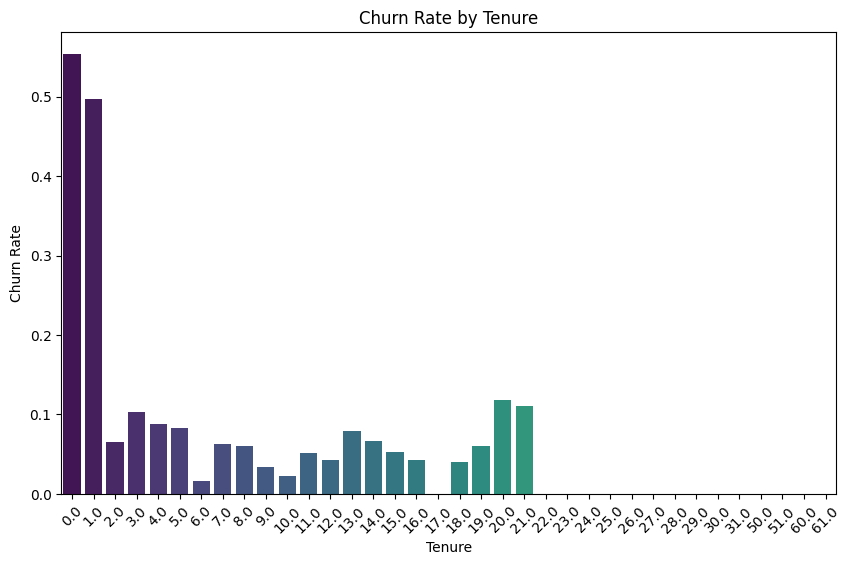

In [18]:
# Calculate the churn rates for each category of 'Tenure'
churn_rates = df.groupby('Tenure')['Churn'].mean().reset_index()

# Sort the data by 'Tenure' in ascending order
churn_rates = churn_rates.sort_values('Tenure')

# Plot the churn rates
plt.figure(figsize=(10, 6))
sns.barplot(x='Tenure', y='Churn', data=churn_rates, palette='viridis')
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Tenure')
plt.xticks(rotation=45)
plt.show()

### Visualisation and Analysis PreferedOrderCat

In the 'PreferedOrderCat' column, we can observe that the most trending orders in the last month are related to the tech category. The top two preferred order categories are "Laptop & Accessory" and "Mobile Phone."

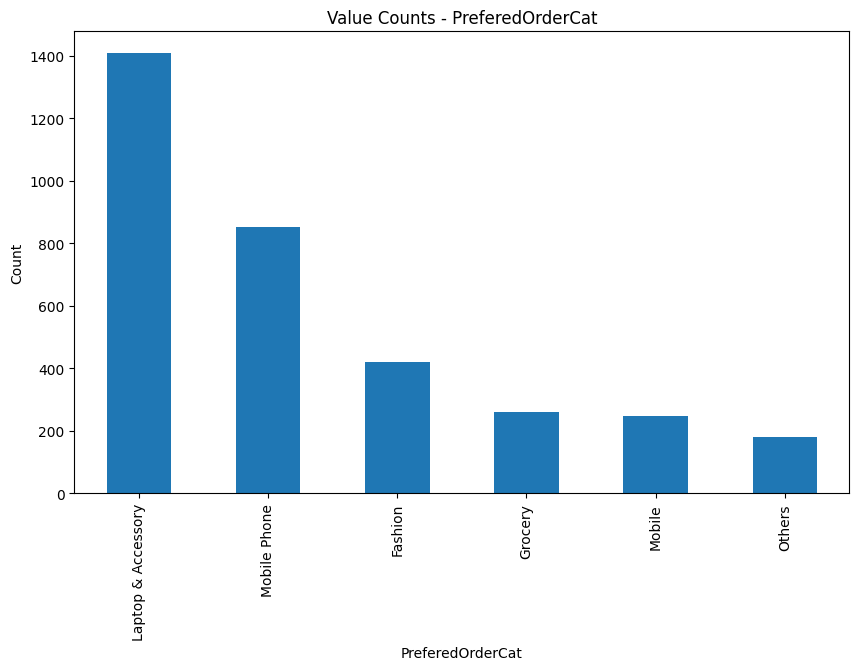

In [19]:
# Calculate value counts of PreferedOrderCat column
warehouse_counts = df['PreferedOrderCat'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
warehouse_counts.plot(kind='bar')
plt.title('Value Counts - PreferedOrderCat')
plt.xlabel('PreferedOrderCat')
plt.ylabel('Count')
plt.show()

In [20]:
df.value_counts('PreferedOrderCat')

PreferedOrderCat
Laptop & Accessory    1408
Mobile Phone           851
Fashion                419
Grocery                261
Mobile                 246
Others                 179
Name: count, dtype: int64

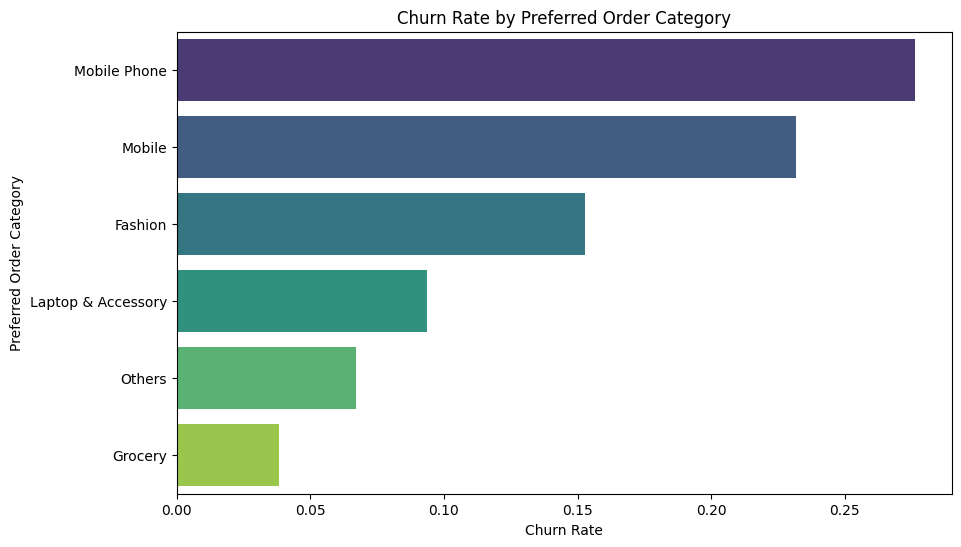

In [21]:
# Calculate the churn rates for each category of 'PreferedOrderCat'
churn_rates = df.groupby('PreferedOrderCat')['Churn'].mean().reset_index()

# Sort the data by churn rates in descending order
churn_rates = churn_rates.sort_values('Churn', ascending=False)

# Plot the churn rates
plt.figure(figsize=(10, 6))
sns.barplot(x='Churn', y='PreferedOrderCat', data=churn_rates, palette='viridis')
plt.xlabel('Churn Rate')
plt.ylabel('Preferred Order Category')
plt.title('Churn Rate by Preferred Order Category')
plt.show()


### Visualisation and Analysis SatisfactionScore

In the 'SatisfactionScore' column, we can observe that the average satisfaction score of customers in the last month is mostly "Cukup" (meaning "Moderate" in English). However, it is important to note that there is still a significant number of customers with a satisfaction score of 1.

While there are more customers who provided a satisfaction score of 5, we should still address the dissatisfaction expressed by customers who gave a score of 1. This indicates areas of concern that require attention in order to improve customer satisfaction and address any issues or shortcomings.

Reducing the number of customers with a satisfaction score of 1 should be a priority to enhance overall customer experience and loyalty. This can be achieved through various means such as improving product quality, enhancing customer service, addressing complaints effectively, and continuously striving to meet customer expectations.

By focusing on improving customer satisfaction and reducing the number of dissatisfied customers, the e-commerce company can build stronger customer relationships, foster loyalty, and ultimately drive business growth.

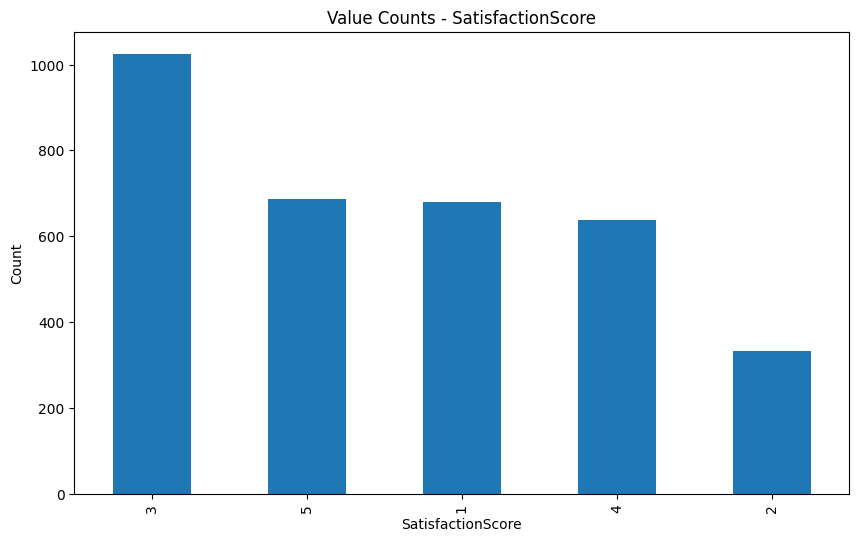

In [22]:
# Calculate value counts of SatisfactionScore column
warehouse_counts = df['SatisfactionScore'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
warehouse_counts.plot(kind='bar')
plt.title('Value Counts - SatisfactionScore')
plt.xlabel('SatisfactionScore')
plt.ylabel('Count')
plt.show()

In [23]:
df.value_counts('SatisfactionScore')

SatisfactionScore
3    1025
5     687
1     681
4     639
2     332
Name: count, dtype: int64

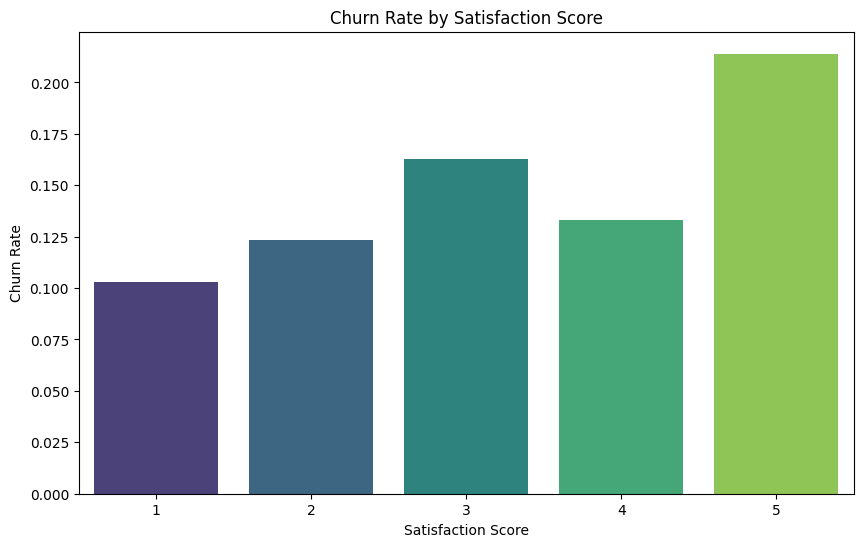

In [24]:
# Calculate the churn rates for each value of 'SatisfactionScore'
churn_rates = df.groupby('SatisfactionScore')['Churn'].mean().reset_index()

# Sort the data by 'SatisfactionScore' in ascending order
churn_rates = churn_rates.sort_values('SatisfactionScore')

# Plot the churn rates
plt.figure(figsize=(10, 6))
sns.barplot(x='SatisfactionScore', y='Churn', data=churn_rates, palette='viridis')
plt.xlabel('Satisfaction Score')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Satisfaction Score')
plt.show()


### Visualisation and Analysis MaritalStatus

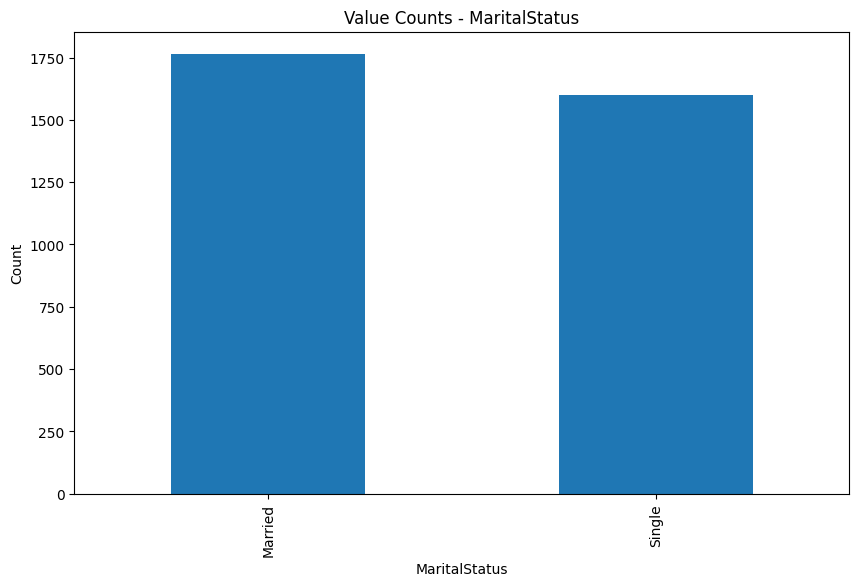

In [25]:
# Calculate value counts of MaritalStatus column
warehouse_counts = df['MaritalStatus'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
warehouse_counts.plot(kind='bar')
plt.title('Value Counts - MaritalStatus')
plt.xlabel('MaritalStatus')
plt.ylabel('Count')
plt.show()

In [26]:
df.value_counts('MaritalStatus')

MaritalStatus
Married    1766
Single     1598
Name: count, dtype: int64

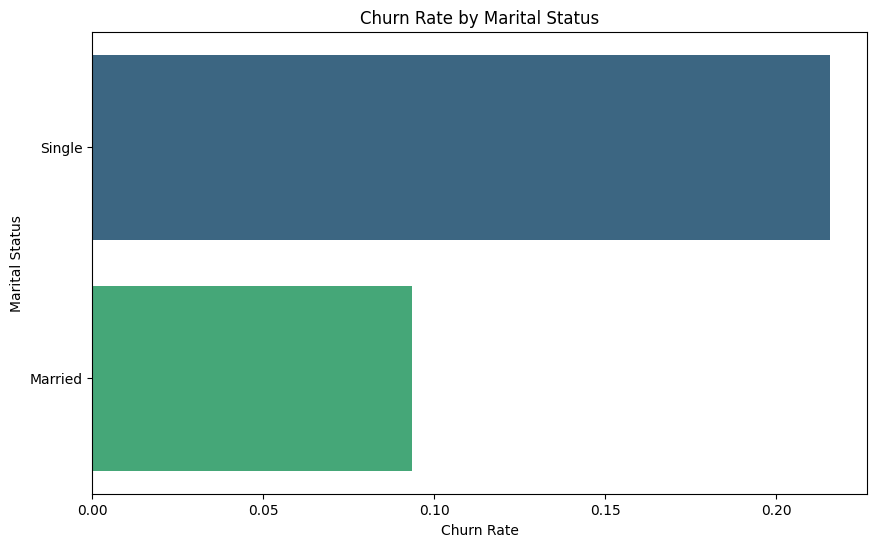

In [27]:
# Calculate the churn rates for each category of 'MaritalStatus'
churn_rates = df.groupby('MaritalStatus')['Churn'].mean().reset_index()

# Sort the data by churn rates in descending order
churn_rates = churn_rates.sort_values('Churn', ascending=False)

# Plot the churn rates
plt.figure(figsize=(10, 6))
sns.barplot(x='Churn', y='MaritalStatus', data=churn_rates, palette='viridis')
plt.xlabel('Churn Rate')
plt.ylabel('Marital Status')
plt.title('Churn Rate by Marital Status')
plt.show()


### Visualisation and Analysis NumberOfAddress

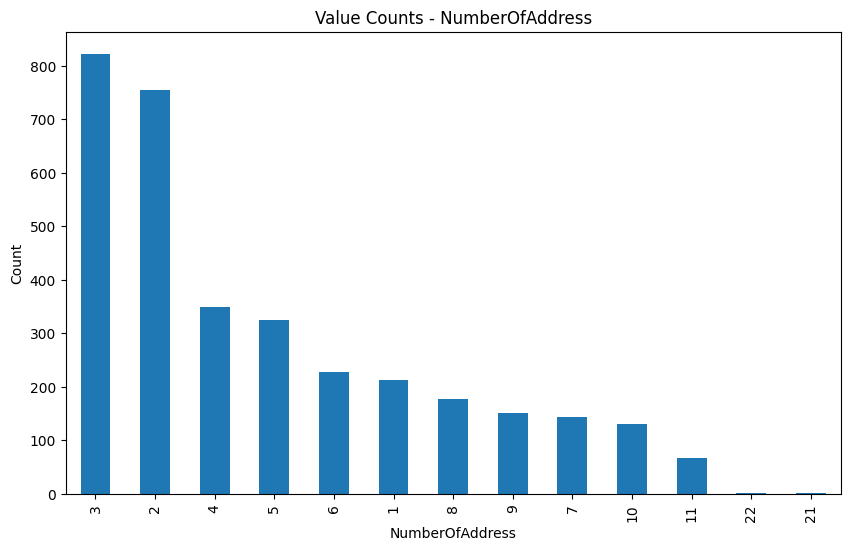

In [28]:
# Calculate value counts of NumberOfAddress column
warehouse_counts = df['NumberOfAddress'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
warehouse_counts.plot(kind='bar')
plt.title('Value Counts - NumberOfAddress')
plt.xlabel('NumberOfAddress')
plt.ylabel('Count')
plt.show()

In [29]:
df.value_counts('NumberOfAddress')

NumberOfAddress
3     822
2     755
4     350
5     325
6     228
1     212
8     178
9     152
7     143
10    130
11     67
21      1
22      1
Name: count, dtype: int64

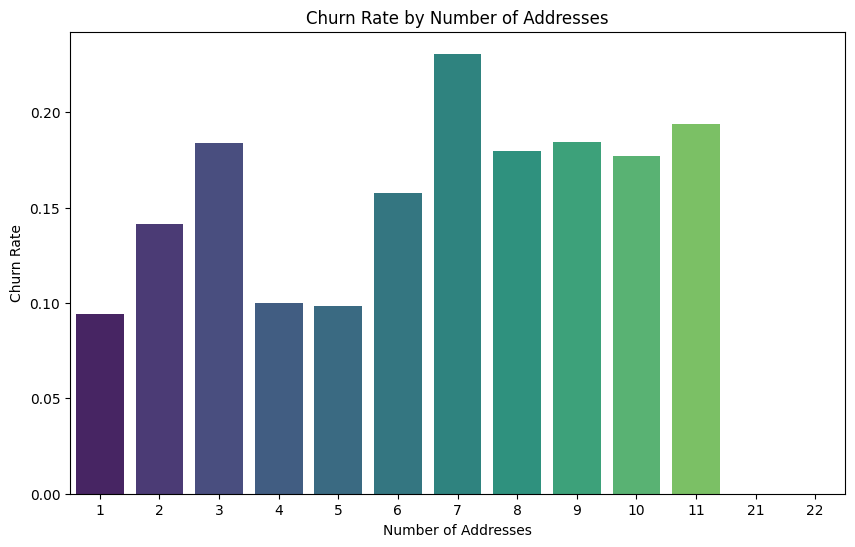

In [30]:
# Calculate the churn rates for each value of 'NumberOfAddress'
churn_rates = df.groupby('NumberOfAddress')['Churn'].mean().reset_index()

# Sort the data by 'NumberOfAddress' in ascending order
churn_rates = churn_rates.sort_values('NumberOfAddress')

# Plot the churn rates
plt.figure(figsize=(10, 6))
sns.barplot(x='NumberOfAddress', y='Churn', data=churn_rates, palette='viridis')
plt.xlabel('Number of Addresses')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Number of Addresses')
plt.show()


### Visualisation and Analysis Complain

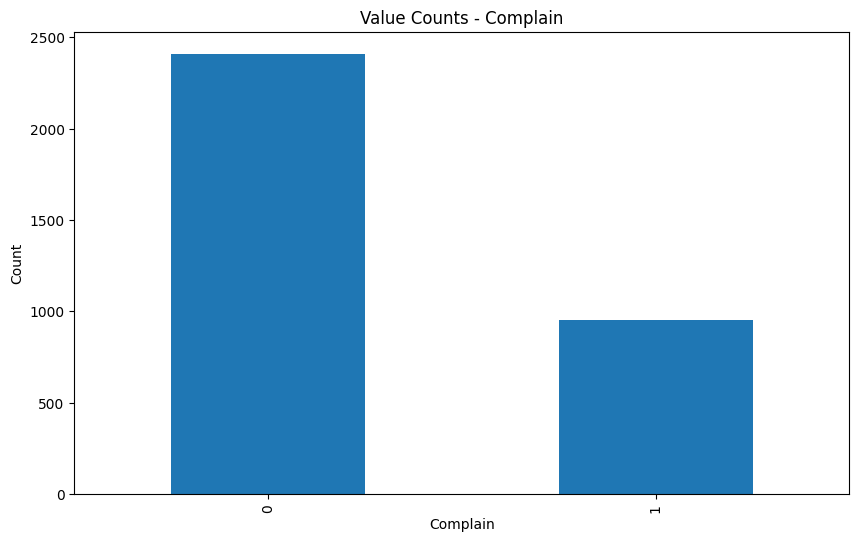

In [31]:
# Calculate value counts of Complain column
warehouse_counts = df['Complain'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
warehouse_counts.plot(kind='bar')
plt.title('Value Counts - Complain')
plt.xlabel('Complain')
plt.ylabel('Count')
plt.show()

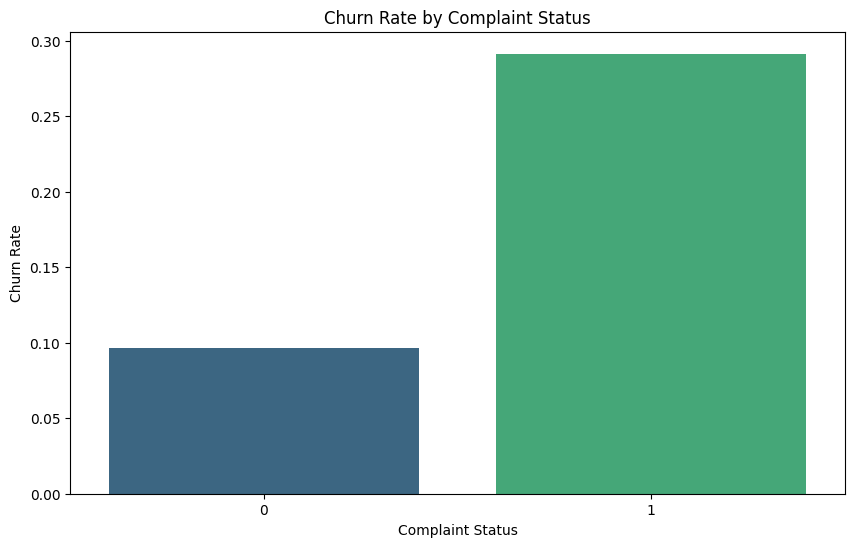

In [32]:
# Calculate the churn rates for each category of 'Complain'
churn_rates = df.groupby('Complain')['Churn'].mean().reset_index()

# Sort the data by churn rates in descending order
churn_rates = churn_rates.sort_values('Churn', ascending=False)

# Plot the churn rates
plt.figure(figsize=(10, 6))
sns.barplot(x='Complain', y='Churn', data=churn_rates, palette='viridis')
plt.xlabel('Complaint Status')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Complaint Status')
plt.show()


### Visualisation and Analysis DaySinceLastOrder

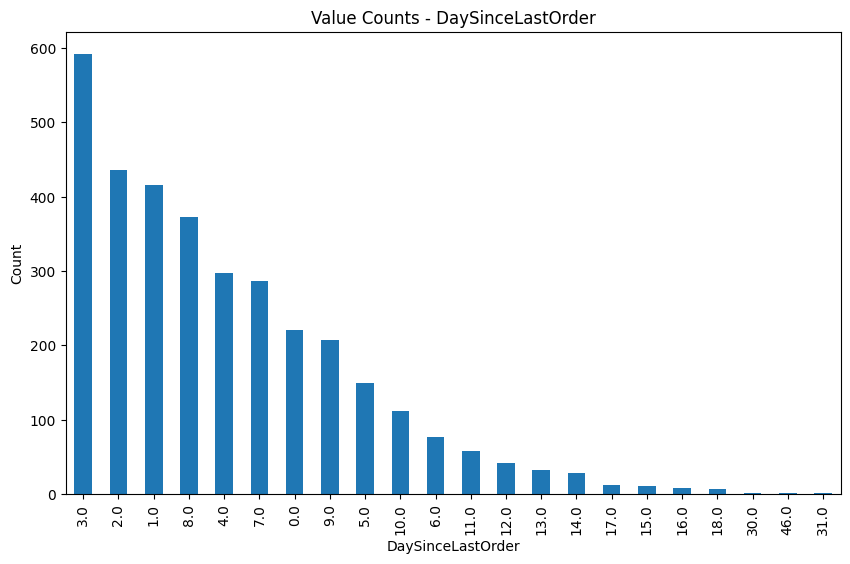

In [33]:
# Calculate value counts of DaySinceLastOrder column
warehouse_counts = df['DaySinceLastOrder'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
warehouse_counts.plot(kind='bar')
plt.title('Value Counts - DaySinceLastOrder')
plt.xlabel('DaySinceLastOrder')
plt.ylabel('Count')
plt.show()

In [34]:
df.value_counts('DaySinceLastOrder')

DaySinceLastOrder
3.0     592
2.0     436
1.0     416
8.0     372
4.0     297
7.0     286
0.0     221
9.0     207
5.0     149
10.0    111
6.0      76
11.0     58
12.0     42
13.0     32
14.0     28
17.0     12
15.0     11
16.0      8
18.0      7
30.0      1
31.0      1
46.0      1
Name: count, dtype: int64

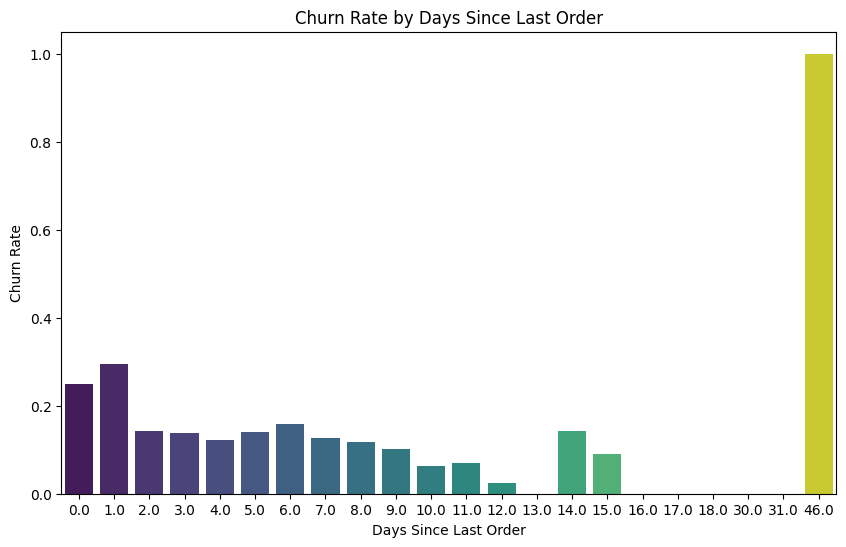

In [35]:
# Calculate the churn rates for each value of 'DaySinceLastOrder'
churn_rates = df.groupby('DaySinceLastOrder')['Churn'].mean().reset_index()

# Sort the data by 'DaySinceLastOrder' in ascending order
churn_rates = churn_rates.sort_values('DaySinceLastOrder')

# Plot the churn rates
plt.figure(figsize=(10, 6))
sns.barplot(x='DaySinceLastOrder', y='Churn', data=churn_rates, palette='viridis')
plt.xlabel('Days Since Last Order')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Days Since Last Order')
plt.show()


### Visualisation and Analysis NumberOfDeviceRegistered

In [36]:
df.value_counts('NumberOfDeviceRegistered')

NumberOfDeviceRegistered
4    1480
3     946
5     520
2     182
1     139
6      97
Name: count, dtype: int64

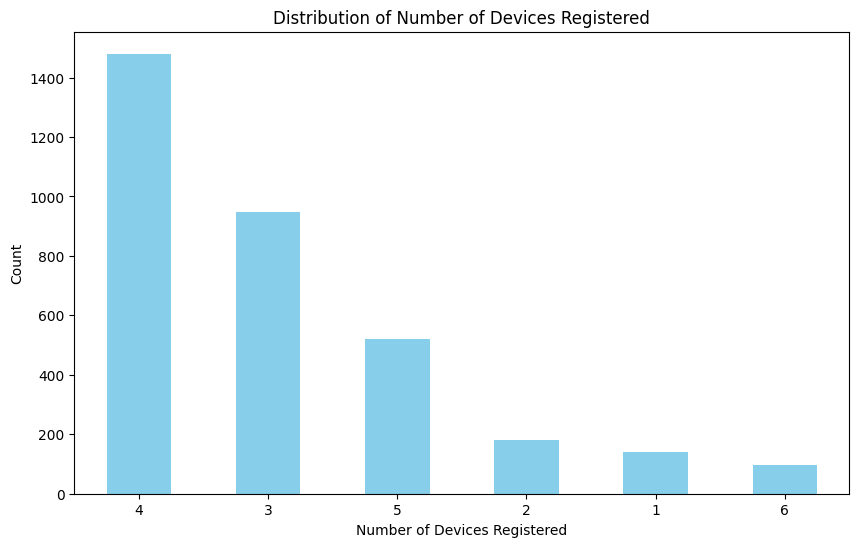

In [37]:
# Calculate the value counts of 'NumberOfDeviceRegistered'
device_counts = df['NumberOfDeviceRegistered'].value_counts()

# Plot the value counts
plt.figure(figsize=(10, 6))
device_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Number of Devices Registered')
plt.ylabel('Count')
plt.title('Distribution of Number of Devices Registered')
plt.xticks(rotation=0)
plt.show()


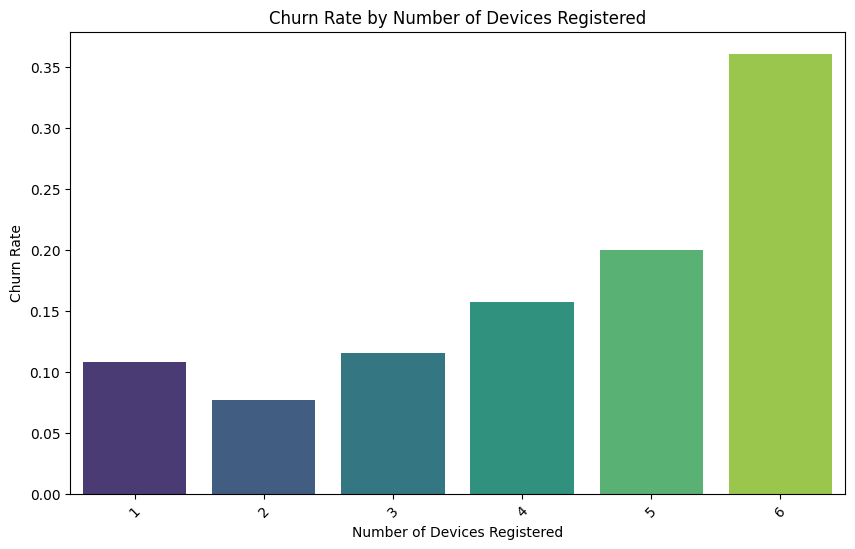

In [38]:
# Calculate the churn rates for each value of 'NumberOfDeviceRegistered'
churn_rates = df.groupby('NumberOfDeviceRegistered')['Churn'].mean().reset_index()

# Sort the data by 'NumberOfDeviceRegistered' in ascending order
churn_rates = churn_rates.sort_values('NumberOfDeviceRegistered')

# Plot the churn rates
plt.figure(figsize=(10, 6))
sns.barplot(x='NumberOfDeviceRegistered', y='Churn', data=churn_rates, palette='viridis')
plt.xlabel('Number of Devices Registered')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Number of Devices Registered')
plt.xticks(rotation=45)
plt.show()


### **SEE THE CORRELATION**

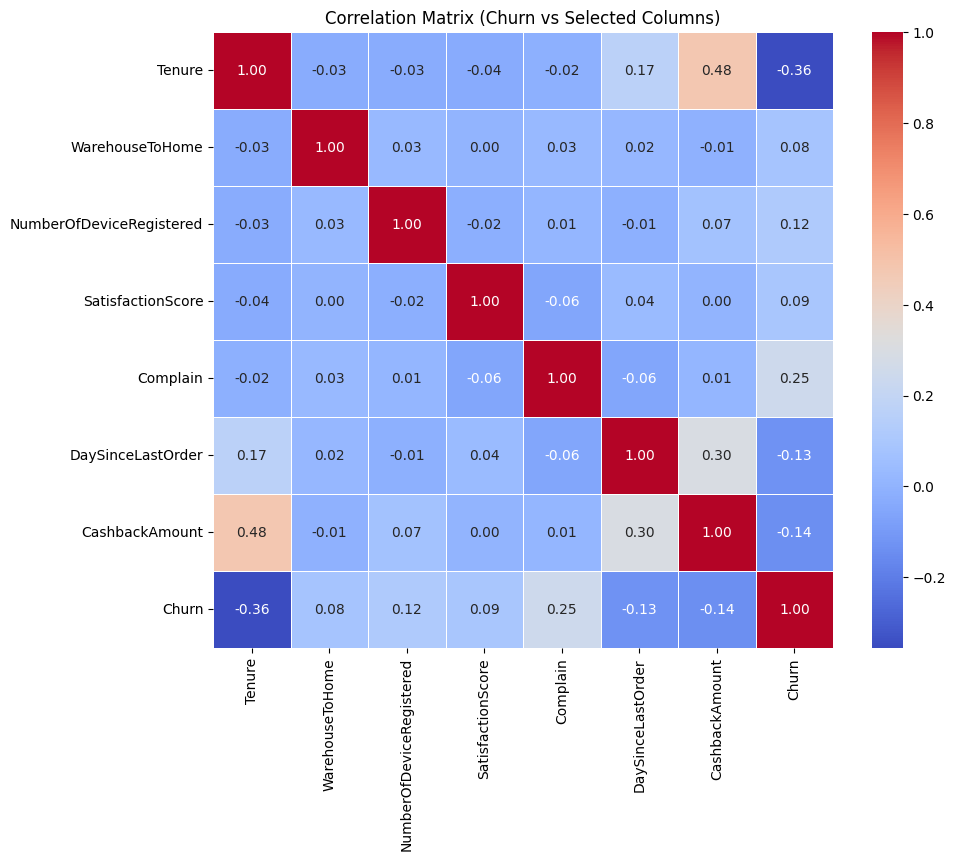

In [39]:
import seaborn as sns

# Create a subset of the data with the selected columns
subset = df[['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'Complain', 'DaySinceLastOrder', 'CashbackAmount', 'Churn']]

# Calculate the correlation matrix
correlation_matrix = subset.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix (Churn vs Selected Columns)')
plt.show()


### MACHINE LEARNING

In [40]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(), ['MaritalStatus']),
    ('binary', BinaryEncoder(), ['PreferedOrderCat'])
], remainder='passthrough')

In [41]:
x = df.drop(columns=['Churn'])
y = df['Churn']

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=2021)

In [43]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

In [45]:
skfold=StratifiedKFold(n_splits=5)
estimator=Pipeline([
    ('preprocess',transformer),
    ('model',logreg)])
model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='roc_auc')
# score.append(model_cv)
# rata.append(model_cv.mean())
# std.append(model_cv.std())

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Musa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Musa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Musa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py", line 1196, in fit
    X, y = self._validate_data(
  File "C:\Users\Musa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Musa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "C:\Users\Musa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "C:\Users\Musa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'


In [44]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],'mean roc_auc':rata,'sdev':std}).set_index('model').sort_values(by='mean roc_auc',ascending=False)

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Musa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Musa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Musa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py", line 1196, in fit
    X, y = self._validate_data(
  File "C:\Users\Musa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Musa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "C:\Users\Musa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "C:\Users\Musa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'


In [ ]:
from sklearn.metrics import precision_score

models = [logreg, knn, dt, rf, xgb, lgbm]
score_roc_auc = []
score_precision = []

def y_pred_func(i):
    estimator = Pipeline([
        ('preprocess', transformer),
        ('model', i)])
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    estimator.fit(x_train, y_train)
    return (estimator, estimator.predict(x_test), x_test, y_test)

for i, j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM']):
    estimator, y_pred, x_test, y_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:, 1]
    
    score_roc_auc.append(roc_auc_score(y_test, y_predict_proba))
    score_precision.append(precision_score(y_test, y_pred))
    
    print(j, '\n', classification_report(y_test, y_pred))
    
pd.DataFrame({'model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],
                          '
                          
                          roc_auc_score': score_roc_auc,
                          'precision_score': score_precision}).set_index('model').sort_values(by='roc_auc_score', ascending=False)

C:\Users\Musa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       569
           1       0.68      0.47      0.56       104

    accuracy                           0.88       673
   macro avg       0.79      0.72      0.75       673
weighted avg       0.87      0.88      0.88       673

KNN 
               precision    recall  f1-score   support

           0       0.89      0.94      0.92       569
           1       0.54      0.38      0.44       104

    accuracy                           0.85       673
   macro avg       0.72      0.66      0.68       673
weighted avg       0.84      0.85      0.84       673

Decision Tree 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       569
           1       0.72      0.74      0.73       104

    accuracy                           0.92       673
   macro avg       0.84      0.84      0.84       673
weighted avg       0.92      0

,roc_auc_score,precision_score
model,,
LightGBM,0.951974,0.847826
Random Forest,0.950470,0.835294
XGBoost,0.949135,0.864583
Logistic Regression,0.875777,0.680556
Decision Tree,0.843830,0.719626
KNN,0.797654,0.541667
